In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:50% !important;height:70% !important;</style>"
HTML( style )

In [2]:
df = pd.read_csv('train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
df['Sex'] = df['Sex'].apply(lambda x: 0 if x == 'male' else 1)
df['Embarked'] = df['Embarked'].apply(lambda x:0 if x == 'C' else (1 if x == 'Q' else 2))
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         2
1         1       1    1  38.0      1      0  71.2833         0
2         1       3    1  26.0      0      0   7.9250         2
3         1       1    1  35.0      1      0  53.1000         2
4         0       3    0  35.0      0      0   8.0500         2

In [7]:
mean_age_male = df.loc[df['Sex'] == 0, 'Age'].mean()
mean_age_female = df.loc[df['Sex'] == 1, 'Age'].mean()

df['Age'] = df.apply(lambda row: mean_age_male if pd.isnull(row['Age']) and row['Sex'] == 0 else
                                   mean_age_female if pd.isnull(row['Age']) and row['Sex'] == 1 else
                                   row['Age'], axis=1)

<Axes: >

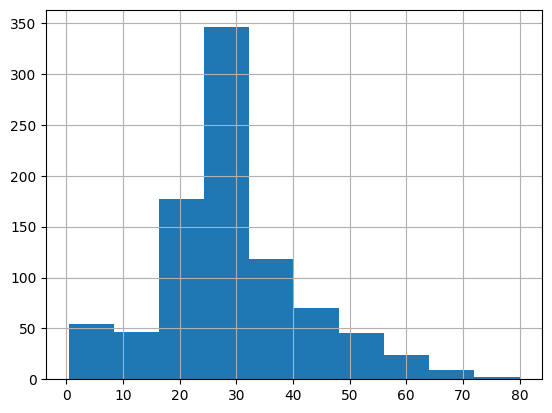

In [30]:
df['Age'].hist()

<Axes: >

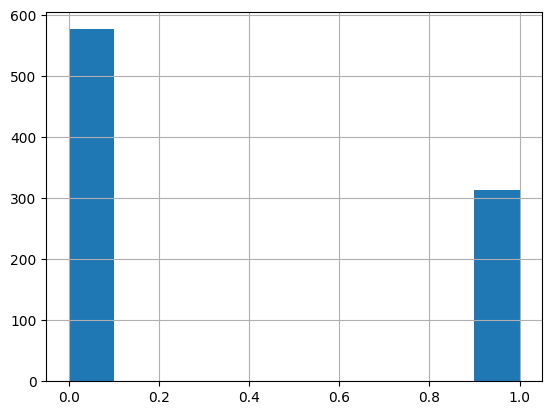

In [31]:
df['Sex'].hist()

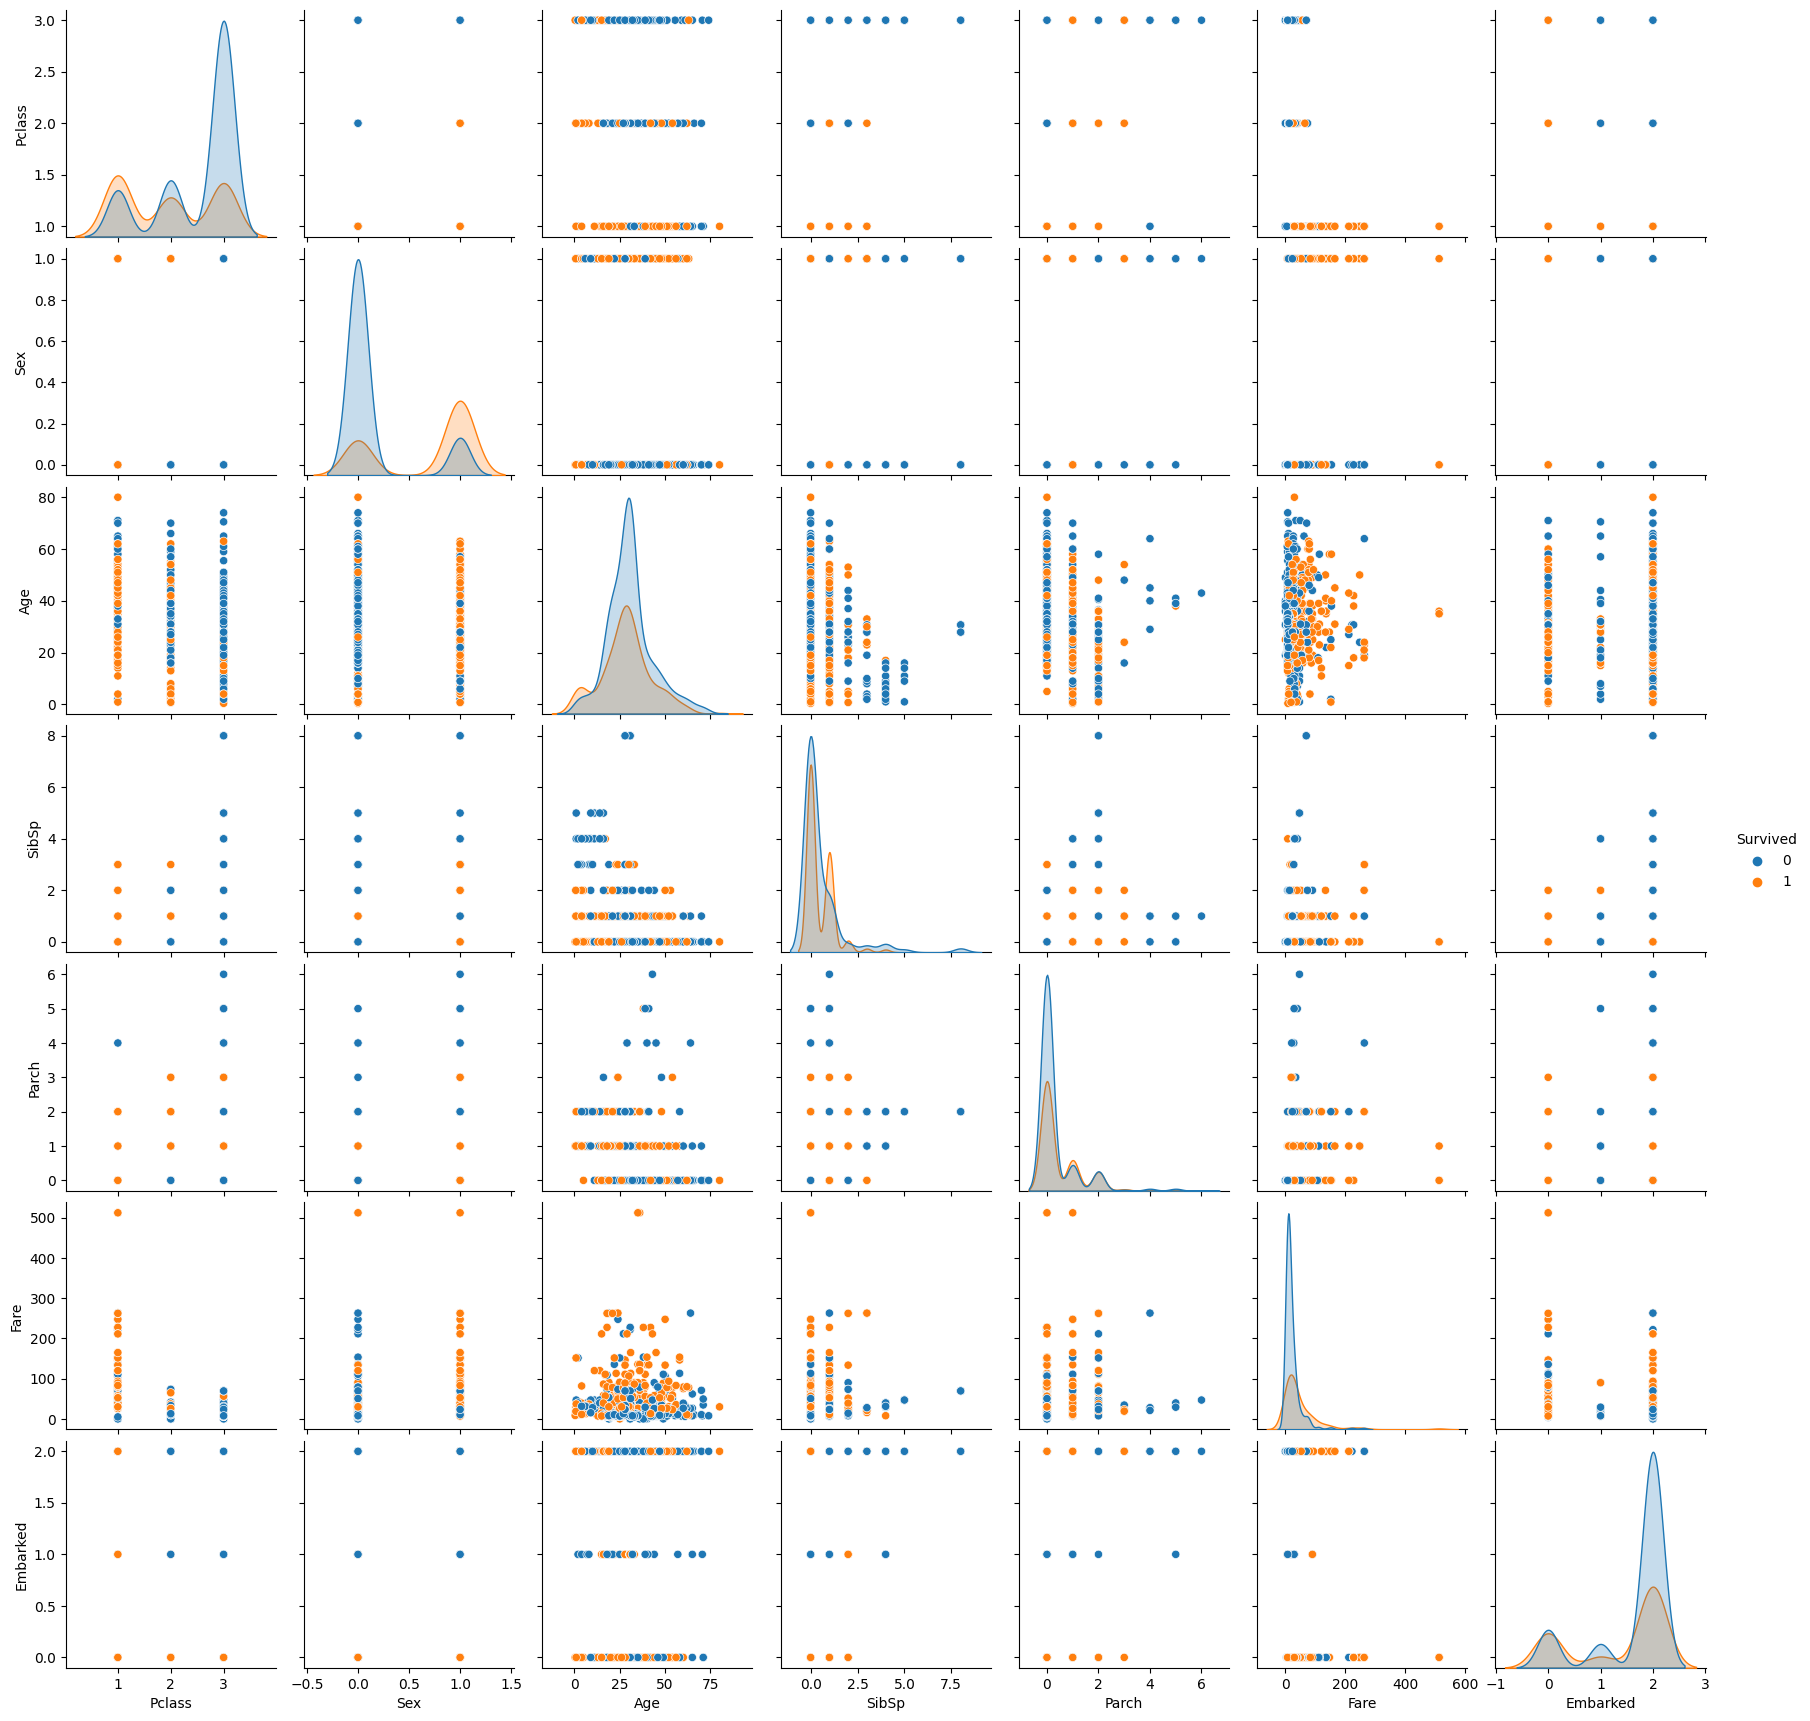

In [8]:
sns.pairplot(data=df, hue='Survived')

<Axes: >

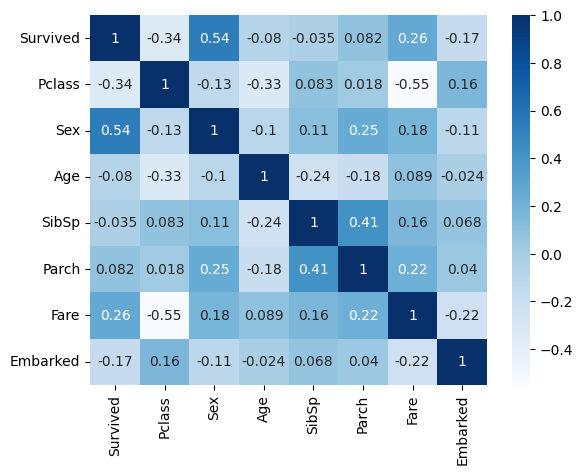

In [9]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [10]:
X_train = df.drop(['Survived', 'Age', 'SibSp', 'Parch'], axis=1)
y_train = df['Survived']

In [11]:
X_train.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         2
1       1    1  38.0      1      0  71.2833         0
2       3    1  26.0      0      0   7.9250         2
3       1    1  35.0      1      0  53.1000         2
4       3    0  35.0      0      0   8.0500         2

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [13]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [14]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [15]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [16]:
best_clf = grid_search_cv_clf.best_estimator_

In [17]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

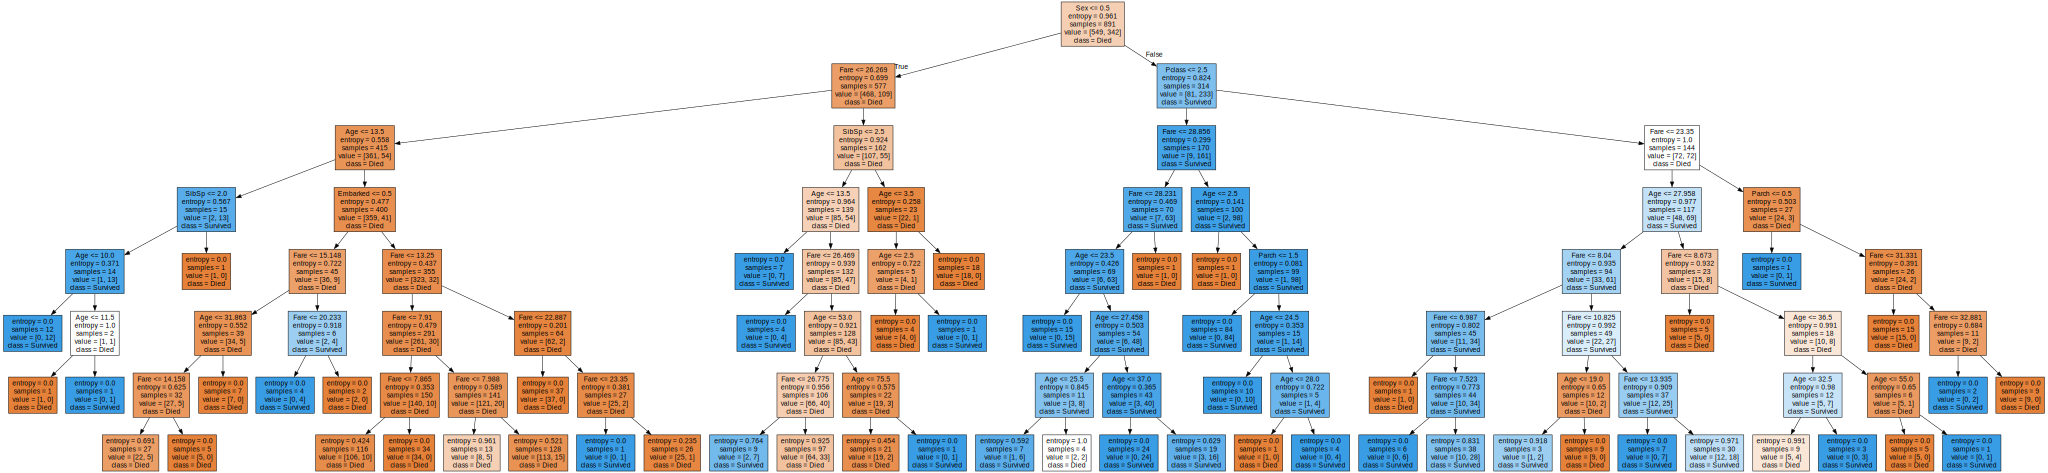

In [18]:
graph = Source(tree.export_graphviz(best_clf, out_file=None, feature_names=list(X_train), class_names=['Died', 'Survived'], filled=True))

display(SVG(graph.pipe(format='svg')))

In [19]:
df_test = pd.read_csv('test.csv')
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [20]:
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [21]:
df_test['Sex'] = df_test['Sex'].apply(lambda x: 0 if x == 'male' else 1)
df_test['Embarked'] = df_test['Embarked'].apply(lambda x:0 if x == 'C' else (1 if x == 'Q' else 2))
df_test.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         1
1       3    1  47.0      1      0   7.0000         2
2       2    0  62.0      0      0   9.6875         1
3       3    0  27.0      0      0   8.6625         2
4       3    1  22.0      1      1  12.2875         2

In [22]:
X_test = df.drop(['Survived', 'Age', 'SibSp', 'Parch'], axis=1)
y_test = df['Survived']

In [23]:
y_pred = best_clf.predict(X_test)

In [26]:
precision_score(y_test, y_pred)

0.9013605442176871

In [27]:
recall_score(y_test, y_pred)

0.7748538011695907